<a href="https://colab.research.google.com/github/salim-hbk/ai-ml/blob/main/Multiple_Output_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Normally, the wines are classified into one of the quality ratings specified in the attributes. In this exercise, you will combine the two datasets to predict the wine quality and whether the wine is red or white solely from the attributes.

You will model wine quality estimations as a regression problem and wine type detection as a binary classification problem.

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
white_df = pd.read_csv(URL, sep=";")
white_df['is_red'] = 0

In [4]:
white_df =  white_df.drop_duplicates(keep='first')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


In [5]:
# URL of the red wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# load the dataset from the URL
red_df = pd.read_csv(URL, sep=";")

# fill the `is_red` column with ones.
red_df["is_red"] = 1

# keep only the first of duplicate items
red_df = red_df.drop_duplicates(keep='first')

In [6]:
df = pd.concat([red_df, white_df], ignore_index=True)
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.255451
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,0.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Lets chart the wine dataset based on the wine quality to check balanced vs imbalanced dataset

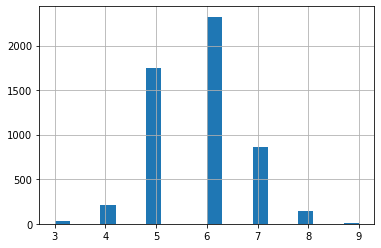

In [8]:
df['quality'].hist(bins=20)

As we can see there are very few data related to quality index 3,4,8,9

In [11]:
df = df[(df['quality']>4) & (df['quality']<8)]
df = df.reset_index(drop=True)

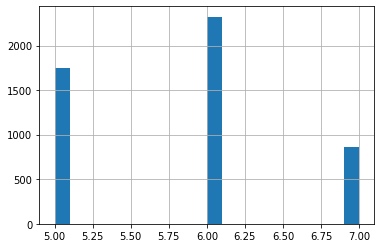

In [12]:
df['quality'].hist(bins=20)

Train Test Split (TODO)
Next, you can split the datasets into training, test and validation datasets.

*   The data frame should be split 80:20 into train and test sets.
*   The resulting train should then be split 80:20 into train and val sets.
*   The train_test_split parameter test_size takes a float value that ranges between 0. and 1, and represents the proportion of the dataset that is allocated to the test set. The rest of the data is allocated to the training set.

In [28]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
train, val = train_test_split(train, test_size=0.2, random_state=1)

In [29]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
225,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4,5,1
3557,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6,0
3825,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4,5,0
1740,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,0
1221,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9,6,1


In [30]:
train_stats  = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()

In [31]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


**Get the labels**

The features and labels are currently in the same dataframe.


*   You will want to store the label columns is_red and quality separately from the feature columns.
*   The following function, format_output, gets these two columns from the dataframe (it's given to you).
*   format_output also formats the data into numpy arrays.
*   format_output also formats the data into numpy arrays.
*   Please use the format_output and apply it to the train, val and test sets to get dataframes for the labels.



In [32]:
def format_output(data):
  is_red = data.pop('is_red')
  is_red = np.array(is_red)
  quality = data.pop('quality')
  quality = np.array(quality)
  return (quality, is_red)

In [33]:
train_y = format_output(train)
test_y = format_output(test)
val_y = format_output(val)

**Normalize the data**

Next, you can normalize the data, x, using the formula:

image.png

1.   The norm function is defined for you.
2.   Please apply the norm function to normalize the dataframes that contains the feature columns of train, val and test sets.



In [34]:
def norm(data):
  return (data-train_stats['mean'])/train_stats['std']

In [35]:
norm_train_X = norm(train)
norm_test_X  = norm(test)
norm_val_X   = norm(val)

**Define the Model**

Define the model using the functional API. The base model will be 2 Dense layers of 128 neurons each, and have the 'relu' activation.

In [41]:
def base_model(input):
  dense_layer = tf.keras.layers.Dense(128, activation='relu')(input)
  dense_layer = tf.keras.layers.Dense(128, activation='relu')(dense_layer)
  return dense_layer

In [45]:
def final_model(inputs):
  x  = base_model(inputs)
  quality = Dense(1, name='wine_quality')(x)
  is_red = Dense(1, name='wine_type', activation='sigmoid')(x)

  model = Model(inputs=inputs, outputs=[quality, is_red])
  return model

**Compiling the Model**

Next, compile the model. When setting the loss parameter of model.compile, you're setting the loss for each of the two outputs (wine quality and wine type)

. To set more than one loss, use a dictionary of key-value pairs.

You can look at the docs for the losses here.
Note: For the desired spelling, please look at the "Functions" section of the documentation and not the "classes" section on that same page.
wine_type: Since you will be performing binary classification on wine type, you should use the binary crossentropy loss function for it. Please pass this in as a string.

Hint, this should be all lowercase. In the documentation, you'll see this under the "Functions" section, not the "Classes" section.

wine_quality: since this is a regression output, use the mean squared error. Please pass it in as a string, all lowercase.
Hint: You may notice that there are two aliases for mean squared error. Please use the shorter name.

You will also set the metric for each of the two outputs. Again, to set metrics for two or more outputs, use a dictionary with key value pairs.

The metrics documentation is linked here.
For the wine type, please set it to accuracy as a string, all lowercase.
For wine quality, please use the root mean squared error. Instead of a string, you'll set it to an instance of the class RootMeanSquaredError, which belongs to the tf.keras.metrics module.


In [46]:
input = Input(shape=(11,))
rmse = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model = final_model(input)

model.compile(optimizer= rmse, loss={'wine_type' : 'binary_crossentropy',
                      'wine_quality' : 'mean_squared_error'
                     }, metrics={'wine_type' : 'accuracy',
                      'wine_quality' : tf.keras.metrics.RootMeanSquaredError()
                     })

In [47]:
history = model.fit(norm_train_X, train_y, epochs=180, validation_data=(norm_val_X, val_y))

Epoch 1/180
99/99 [==============================] - 2s 5ms/step - loss: 27.0521 - wine_quality_loss: 26.3547 - wine_type_loss: 0.6974 - wine_quality_root_mean_squared_error: 5.1287 - wine_type_accuracy: 0.5526 - val_loss: 16.4967 - val_wine_quality_loss: 15.8064 - val_wine_type_loss: 0.6904 - val_wine_quality_root_mean_squared_error: 3.9757 - val_wine_type_accuracy: 0.6451
Epoch 2/180
99/99 [==============================] - 0s 2ms/step - loss: 13.5387 - wine_quality_loss: 12.8635 - wine_type_loss: 0.6752 - wine_quality_root_mean_squared_error: 3.5803 - wine_type_accuracy: 0.6922 - val_loss: 7.0227 - val_wine_quality_loss: 6.4024 - val_wine_type_loss: 0.6203 - val_wine_quality_root_mean_squared_error: 2.5303 - val_wine_type_accuracy: 0.7605
Epoch 3/180
99/99 [==============================] - 0s 2ms/step - loss: 5.9248 - wine_quality_loss: 5.3347 - wine_type_loss: 0.5901 - wine_quality_root_mean_squared_error: 2.3068 - wine_type_accuracy: 0.7740 - val_loss: 3.3675 - val_wine_quality_l

In [49]:
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

25/25 [==============================] - 0s 1ms/step - loss: 0.3485 - wine_quality_loss: 0.3227 - wine_type_loss: 0.0258 - wine_quality_root_mean_squared_error: 0.5681 - wine_type_accuracy: 0.9949

loss: 0.3484939932823181
wine_quality_loss: 0.3227097690105438
wine_type_loss: 0.025784170255064964
wine_quality_rmse: 0.5680754780769348
wine_type_accuracy: 0.9949302673339844


**Analyze the Model Performance**

Note that the model has two outputs. The output at index 0 is quality and index 1 is wine type

So, round the quality predictions to the nearest integer.

In [50]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

In [51]:
print(quality_pred[0])
print(type_pred[0])
print(type_pred[944])

[5.553753]
[0.00014707]
[0.9999964]


In [52]:

def plot_metrics(metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.plot(history.history[metric_name],color='blue',label=metric_name)
  plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
  cm = confusion_matrix(y_true, y_pred)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm)
  plt.title('Confusion matrix of the classifier')
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="black" if cm[i, j] > thresh else "white")
  plt.show()


def plot_diff(y_true, y_pred, title = '' ):
  plt.scatter(y_true, y_pred)
  plt.title(title)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.axis('square')
  plt.plot([-100, 100], [-100, 100])
  return plt

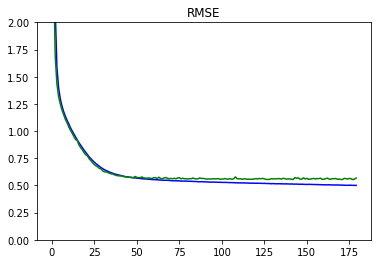

In [53]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

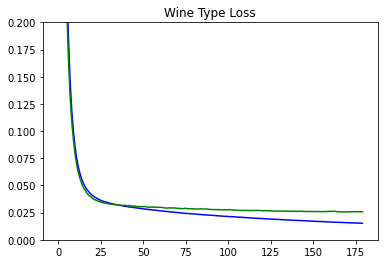

In [54]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)

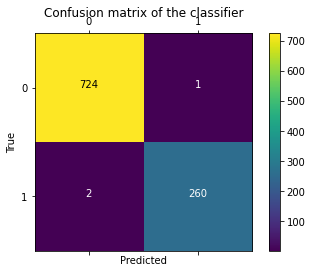

In [56]:
plot_confusion_matrix(test_y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])

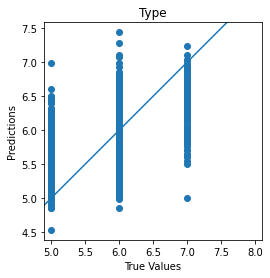

In [58]:
scatter_plot = plot_diff(test_y[0], quality_pred, title='Type')